**Notas para contenedor de docker:**

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `dir_montar` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

```
dir_montar=<ruta completa de mi máquina a mi directorio>#aquí colocar la ruta al directorio a montar, por ejemplo: 
#dir_montar=/Users/erick/midirectorio.
```

Ejecutar:

```
$docker run --rm -v $dir_montar:/datos --name jupyterlab_prope_r_kernel_tidyverse -p 8888:8888 -d palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4   

```

Ir a `localhost:8888` y escribir el password para jupyterlab: `qwerty`

Detener el contenedor de docker:

```
docker stop jupyterlab_prope_r_kernel_tidyverse
```


Documentación de la imagen de docker `palmoreck/jupyterlab_prope_r_kernel_tidyverse:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/prope_r_kernel_tidyverse).

---

Para ejecución de la nota usar:

[docker](https://www.docker.com/) (instalación de forma **local** con [Get docker](https://docs.docker.com/install/)) y ejecutar comandos que están al inicio de la nota de forma **local**. 

**Esta nota utiliza la versión clásica de notebooks de jupyter a través del siguiente botón:**

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/palmoreck/dockerfiles-for-binder/jupyterlab_prope_r_kernel_tidyerse?urlpath=/tree/Propedeutico/Python/clases/3_algebra_lineal/2_interpolacion.ipynb) esta opción crea una máquina individual en un servidor de Google, clona el repositorio y permite la ejecución de los notebooks de jupyter. **Se utiliza la versión clásica pues se usará el comando de magic `%matplotlib notebook`**

[![Run on Repl.it](https://repl.it/badge/github/palmoreck/dummy)](https://repl.it/languages/python3) Esta opción no clona el repositorio, no ejecuta los notebooks de jupyter pero permite ejecución de instrucciones de Python de forma colaborativa con [repl.it](https://repl.it/). Al dar click se crearán nuevos ***repl*** debajo de sus users de ***repl.it***.


# Interpolación

Dados $n+1$ puntos $x_0,x_1,\dots,x_n$ el objetivo es construir una función $f(x)$ tal que $f(x_i) = y_i$ con $y_i$ conocido $\forall i=0,1,\dots,n$.

<img src="https://dl.dropboxusercontent.com/s/m0gks881yffz85f/interpolacion.jpg?dl=0" heigth="300" width="300">

Entre las aplicaciones en interpolación se encuentran:

* Reconstrucción de funciones.
* Aproximación a derivadas e integrales.
* Estimación de funciones en cantidades no conocidas.

## Modelo en interpolación

Típicamente el modelo $f$ es de la forma $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$ con $\phi_j:\mathbb{R} \rightarrow \mathbb{R}$ funciones conocidas y $w_j$ parámetros desconocidos por determinar $\forall j=0,1,\dots,n$.

**Obs:**

* Comúnmente las $\phi_j$'s son funciones polinomiales, trigonométricas, racionales y exponenciales.
* La notación $f(x|w)$ se utiliza para denotar que $w$ es un vector de parámetros a estimar.

## ¿Cómo ajustar el modelo anterior?

El problema de interpolación conduce a plantear y posteriormente resolver un sistema de ecuaciones lineales de la forma $Aw = y$ pues la condición de interpolación es: $f(x_i|w_i) = y_i$, $\forall i=0,1,\dots,n$ con $A \in \mathbb{R}^{{n+1}x{n+1}}$, $w,y \in \mathbb{R}^{n+1}$ definidas como sigue:

$$A = \left[\begin{array}{cccc}
\phi_0(x_0) &\phi_1(x_0)&\dots&\phi_n(x_0)\\
\phi_0(x_1) &\phi_1(x_1)&\dots&\phi_n(x_1)\\
\vdots &\vdots& \vdots&\vdots\\
\phi_0(x_n) &\phi_1(x_n)&\dots&\phi_n(x_n)
\end{array}
\right],
w=
\left[\begin{array}{c}
w_0\\
w_1\\
\vdots \\
w_n
\end{array}
\right] ,
y=
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_n
\end{array}
\right]
$$

Esto es, hay que resolver: $$\begin{array}{ccc} \phi_0(x_0)w_0 + \phi_1(x_0)w_1 + \cdots + \phi_n(x_0)w_n  &= & y_0 \\ \phi_0(x_1)w_0 + \phi_1(x_1)w_1 + \cdots + \phi_n(x_1)w_n  &= & y_1\\ \vdots & & \\ \phi_0(x_n)w_0 + \phi_1(x_n)w_1 + \cdots + \phi_n(x_n)w_n  &= & y_n \end{array}$$ 

que es la condición de  interpolación $f(x_i|w) = y_i \forall i=0,1,\dots,n$ bajo el modelo: $f(x|w) = \displaystyle \sum_{j=0}^nw_j \phi_j(x)$ en notación **matricial**.

## Interpolación polinomial: funciones $\phi_j$'s son polinomios

**En numpy ...**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint

Supongamos que queremos realizar la interpolación a los siguientes puntos:

In [2]:
#pseudorandom array
np.random.seed(2000) #for reproducibility
npoints = 6
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10


In [3]:
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

'x:'
array([11.73673761, 11.89791391,  7.89322658,  9.85108791, 10.58306155,
        7.74076697])
'y:'
array([ -9.86276046, -10.70121322, -10.62078008, -10.47961976,
        -8.79026123, -11.07518386])


ver: [numpy.random.randn](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html#numpy.random.randn)

**Los datos ejemplo**

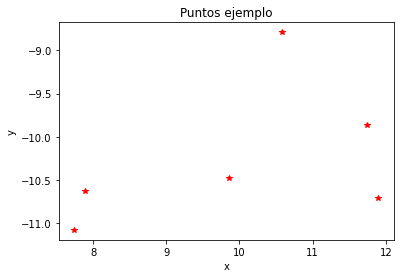

In [4]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

Con numpy podemos usar la función `polyfit` en el paquete de `numpy` para realizar lo anterior: (ver [numpy.polyfit](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html))

El tercer argumento de polyfit especifica el grado del polinomio a ajustar. Como tenemos `npoints = 6` puntos, entonces debemos generar un polinomio de grado $5$

In [5]:
ndegree = npoints -1
coefficients = np.polyfit(x,y,ndegree)

Una vez realizado el llamado a la función `polyfit` se regresan los coeficientes de $x$ ordenados del mayor grado al menor.

In [6]:
np.set_printoptions(precision = 2) #sólo dos decimales que se muestren
pprint.pprint(coefficients)

array([ 8.16e-02, -4.26e+00,  8.78e+01, -8.95e+02,  4.50e+03, -8.98e+03])


Entonces nuestro polinomio es: $$p_{npoints}(x) = .0816x^5 -4.26x^4 +87.8x^3-895x^2+4500x-8980$$

**Nota: si queremos utilizar una representación con la matriz de [Vandermonde](https://en.wikipedia.org/wiki/Vandermonde_matrix) para el sistema de ecuaciones que se resolvió se tiene la siguiente representación matricial:**

$$\left[\begin{array}{ccccc}
1 & x_0 & x_0^2 & x_0^3 & x_0^4 & x_0^5 \\
1 & x_1 & x_1^2 & x_1^3 & x_1^4 & x_1^5\\
\vdots &\vdots& \vdots&\vdots\\
1 & x_5 & x_5^2 & x_5^3 & x_5^4 & x_5^5
\end{array}
\right]
\left[\begin{array}{c}
-8980\\
4500\\
\vdots \\
.0816
\end{array}
\right] =
\left[\begin{array}{c}
y_0\\
y_1\\
\vdots \\
y_5
\end{array}
\right]
$$

**Obs: hay diferentes representaciones matriciales para el problema de interpolación, por ejemplo representación por [Newton](https://en.wikipedia.org/wiki/Newton_polynomial) o por [Lagrange](https://en.wikipedia.org/wiki/Lagrange_polynomial). Cualquiera de las representaciones que se utilicen obtienen el mismo interpolador, la diferencia consiste en propiedades que tienen las matrices de cada representación (la matriz de Vandermonde para un grado alto conduce a tener sistemas de ecuaciones lineales muy sensibles a perturbaciones en los datos).**

**La gráfica**

Ahora nos gustaría graficarlo en el intervalo `[min(x),max(x)]` con `min(x)` la entrada con valor mínimo del numpy array `x` y `max(x)` su entrada con valor máximo.

Para lo anterior debemos evaluar $p_{npoints}(x)$ en diferentes valores de $x$. Para esto, generamos un numpy array con un número de puntos `neval`:

In [7]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(coefficients,xeval)

In [8]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


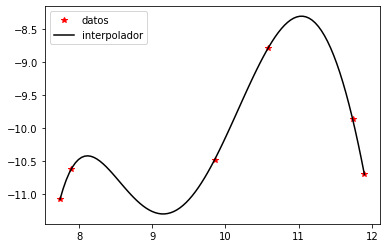

In [9]:
plt.plot(x, y, 'r*', xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

In [10]:
max(yeval)

-8.30968311551078

Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación calcularíamos:

In [11]:
np.polyval(coefficients, 8.5)

-10.740611757826628

### Problema con: número de puntos y la interpolación polinomial

Si incrementamos a 9 puntos por los que deseamos hacer pasar un interpolador tenemos:

In [12]:
#pseudorandom array
np.random.seed(2000) #for reproducibility
npoints = 9
x = np.random.randn(npoints) + 10
y = np.random.randn(npoints) - 10

In [13]:
pprint.pprint('x:')
pprint.pprint(x)
pprint.pprint('y:')
pprint.pprint(y)

'x:'
array([11.74, 11.9 ,  7.89,  9.85, 10.58,  7.74, 10.14,  9.3 ,  9.38])
'y:'
array([-10.48,  -8.79, -11.08,  -9.19, -10.29, -10.22, -10.17,  -8.9 ,
        -9.92])


**Los datos**

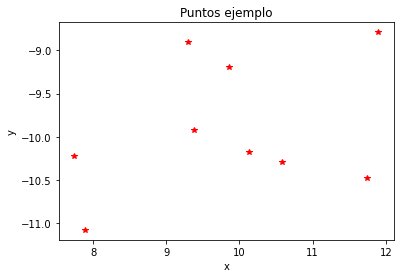

In [14]:
plt.plot(x,y, 'r*')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')
plt.show()

In [15]:
ndegree = npoints -1
new_coefficients = np.polyfit(x,y,ndegree)
pprint.pprint(new_coefficients)

array([ 2.55e+00, -2.01e+02,  6.94e+03, -1.36e+05,  1.66e+06, -1.30e+07,
        6.31e+07, -1.75e+08,  2.11e+08])


Nuestro polinomio ahora es (considerando dos dígitos a la derecha del punto decimal de los resultados anteriores): $$p_{npoints}(x) = 2.55x^8 -201x^7 + 6940x^6-1.36*10^5x^5+1.66*10^6x^4-1.3*10^7x^3 +6.31*10^7x^2-1.75*10^8x+2.11*10^8$$

**La gráfica**

In [16]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = np.polyval(new_coefficients,xeval)

In [17]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


Obsérvese la oscilación que debe tener el polinomio de grado $9$ para pasar por los $10$ puntos:

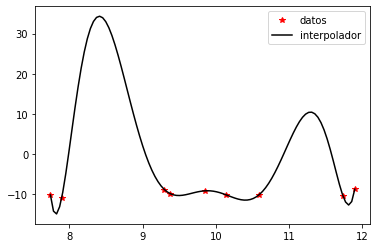

In [18]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador'], loc='best')
plt.show()

In [19]:
max(yeval)

34.327245980501175

Este tipo de oscilación es típica al tener un polinomio mayor o igual a $6$ (más de $7$ puntos). Si tuviéramos que estimar cantidades negativas con nuestro interpolador, entonces la siguiente estimación sería errórena:

In [20]:
np.polyval(new_coefficients,8.5)

32.875958532094955

lo cual es erróneo.

**Nota**

Los interpoladores obtenidos con alguno de los métodos anteriores se utilizan para estimar cantidades en el intervalo con el que fueron construídos. Si deseamos estimar fuera del intervalo debe de realizarse con cuidado pues se pueden tener estimaciones incorrectas.

In [21]:
np.polyval(coefficients, 15)

35.302850723801384

In [22]:
np.polyval(new_coefficients, 15)

867306.9197259247

### Polinomios piecewise

Para arreglar la oscilación de interpoladores de grado alto, una solución es interpolar con polinomios de grado bajo en cada subintervalo compuesto por las $x$'s, esto es, una forma *piecewise*. En python se realiza con el método `interpolate` del paquete `scipy`:

**Lineal**

In [23]:
from scipy.interpolate import interp1d

In [24]:
pw_l = interp1d(x, y) #linear piecewise 

In [25]:
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_l(xeval)

In [26]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


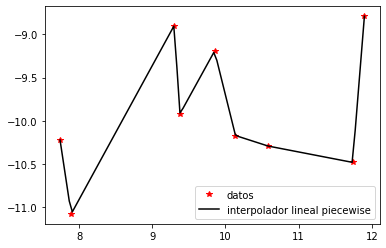

In [27]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','interpolador lineal piecewise'], loc='best')
plt.show()

Aunque se ha resuelto la estimación:

In [28]:
print(pw_l(8.5))

-10.1358074696758


**Splines**

Los *splines* cúbicos *piecewise* resuelven la no diferenciabilidad del interpolador lineal en los puntos dados:

In [29]:
pw_spline = interp1d(x, y, kind = 'cubic') #spline piecewise 
neval = 100
xeval = np.linspace(min(x),max(x), neval)
yeval = pw_spline(xeval)

In [30]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


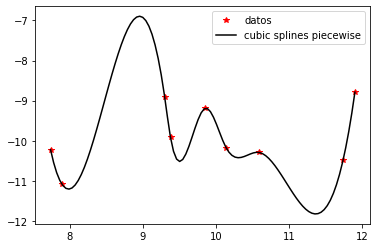

In [31]:
plt.plot(x, y, 'r*',xeval, yeval, 'k-')
plt.legend(['datos','cubic splines piecewise'], loc='best')
plt.show()

In [32]:
print(pw_spline(8.5))

-8.864195192656851


Ver: [Interpolation (scipy.interpolate)](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html)

**(Tarea)Ejercicio: Interpolar con 10 puntos generados de la función de [Runge](https://en.wikipedia.org/wiki/Runge%27s_phenomenon) $f(x) = \frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.**

# Curvas paramétricas e interpolación

Ninguna de las técnicas vistas anteriormente pueden usarse para generar curvas como la de una circunferencia:

In [33]:
radius = 1
npoints = 100

In [34]:
x = np.linspace(-radius,radius,npoints)
y1 = np.sqrt(radius-x**2)
y2 = -np.sqrt(radius-x**2)

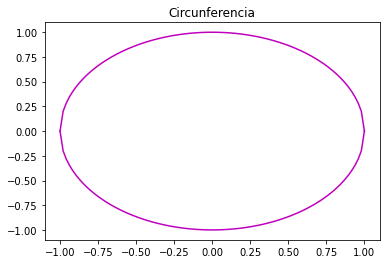

In [35]:
plt.plot(x,y1,'m',
         x,y2,'m')
plt.title("Circunferencia")
plt.show()

pues no puede expresarse como una función del tipo: $y = f(x)$. Obsérvese que para la gráfica anterior se han usado dos funciones: $y_1 = f_1(x) = \sqrt{r-x^2}$, $y_2 = f_2(x) =  -\sqrt{r-x^2}$.

Lo anterior puede resolverse definiendo una función, $f: \mathbb{R} \rightarrow \mathbb{R}^2$, de un parámetro $t$ que tome valores en el intervalo $[0,2\pi)$ y definida por $f(t) = (\cos(t), \sin(t))$. Obsérvese que para $t=0$ se obtiene el punto $(1,0)$, para $t=\frac{\pi}{2}$ se obtiene $(0,1)$ y así sucesivamente hasta $t=2\pi$ en el que obtendríamos nuevamente el punto $(1,0)$. Para este caso se cumple:

$$f(t) = (x(t), y(t))$$

con $x(t) = \cos(t)$, $y(t) = \sin(t)$ funciones tales que $x : \mathbb{R} \rightarrow \mathbb{R}$, $y: \mathbb{R} \rightarrow \mathbb{R}$.

In [36]:
import time

In [37]:
npoints = 100
a = 0
b = 2*np.pi
t = np.linspace(a,b,npoints)
x = np.cos(t)
y = np.sin(t)
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

Ver [plt.draw](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.draw.html#matplotlib-pyplot-draw)

In [32]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    window = 0.5
    plt.xlim(x_min-window, x_max+window)
    plt.ylim(y_min-window, y_max+window)
    plt.plot(x[:idx], y[:idx], 'mo')
    fig.canvas.draw() #redraw the current figure

Ver: [matplotlib magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib), [plt.subplots](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib-pyplot-subplots)

In [5]:
%matplotlib notebook #for interactive plotting
fig, ax = plt.subplots() #create figure that will be used
                         #in make_plot func. Also retrieve axes
for idx,_ in enumerate(t): #enumerate creates tuples 
                           #in a sequentially way
    make_plot(ax, idx)
    time.sleep(0.2)

**Nota: Hay que dar click en el botón arriba de la figura de apagar interactividad.**

## Ejemplo

Usemos la imagen siguiente para realizar una interpolación a una curva paramétrica con *splines*:

In [ ]:
!wget https://www.dropbox.com/s/25zbthmsco6u1u6/hummingbird.png?dl=0 -O hummingbird.png

In [38]:
%%bash 
ls 

0_definiciones_generales.ipynb
1_ecuaciones_lineales.ipynb
2_interpolacion.ipynb
2_interpolacion_parametrica_apoyo.ipynb
3_minimos_cuadrados.ipynb
4_SVD_y_reconstruccion_de_imagenes.ipynb
Kiara.png
Nota_apoyo_1_ecuaciones_lineales.ipynb
Nota_apoyo_3_minimos_cuadrados.ipynb
__pycache__
data_for_nbook_3_minimos_cuadrados.txt
hummingbird.png
img_bottle.png
solve_linear_system_of_equations.py
test_MSE.py
test_solve_linear_system_of_equations.py
utils.py


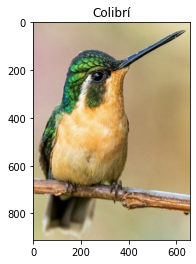

In [39]:
img=plt.imread('hummingbird.png')
plt.imshow(img)
plt.title('Colibrí')
plt.show()

**Nota: Hay que dar click en el botón arriba de la figura de apagar interactividad.**

**De manera interactiva vamos dando click a la imagen anterior con la siguiente celda, en la lista `pos` se irán guardando las coordenadas en donde hagamos click.**

<IPython.core.display.Javascript object>


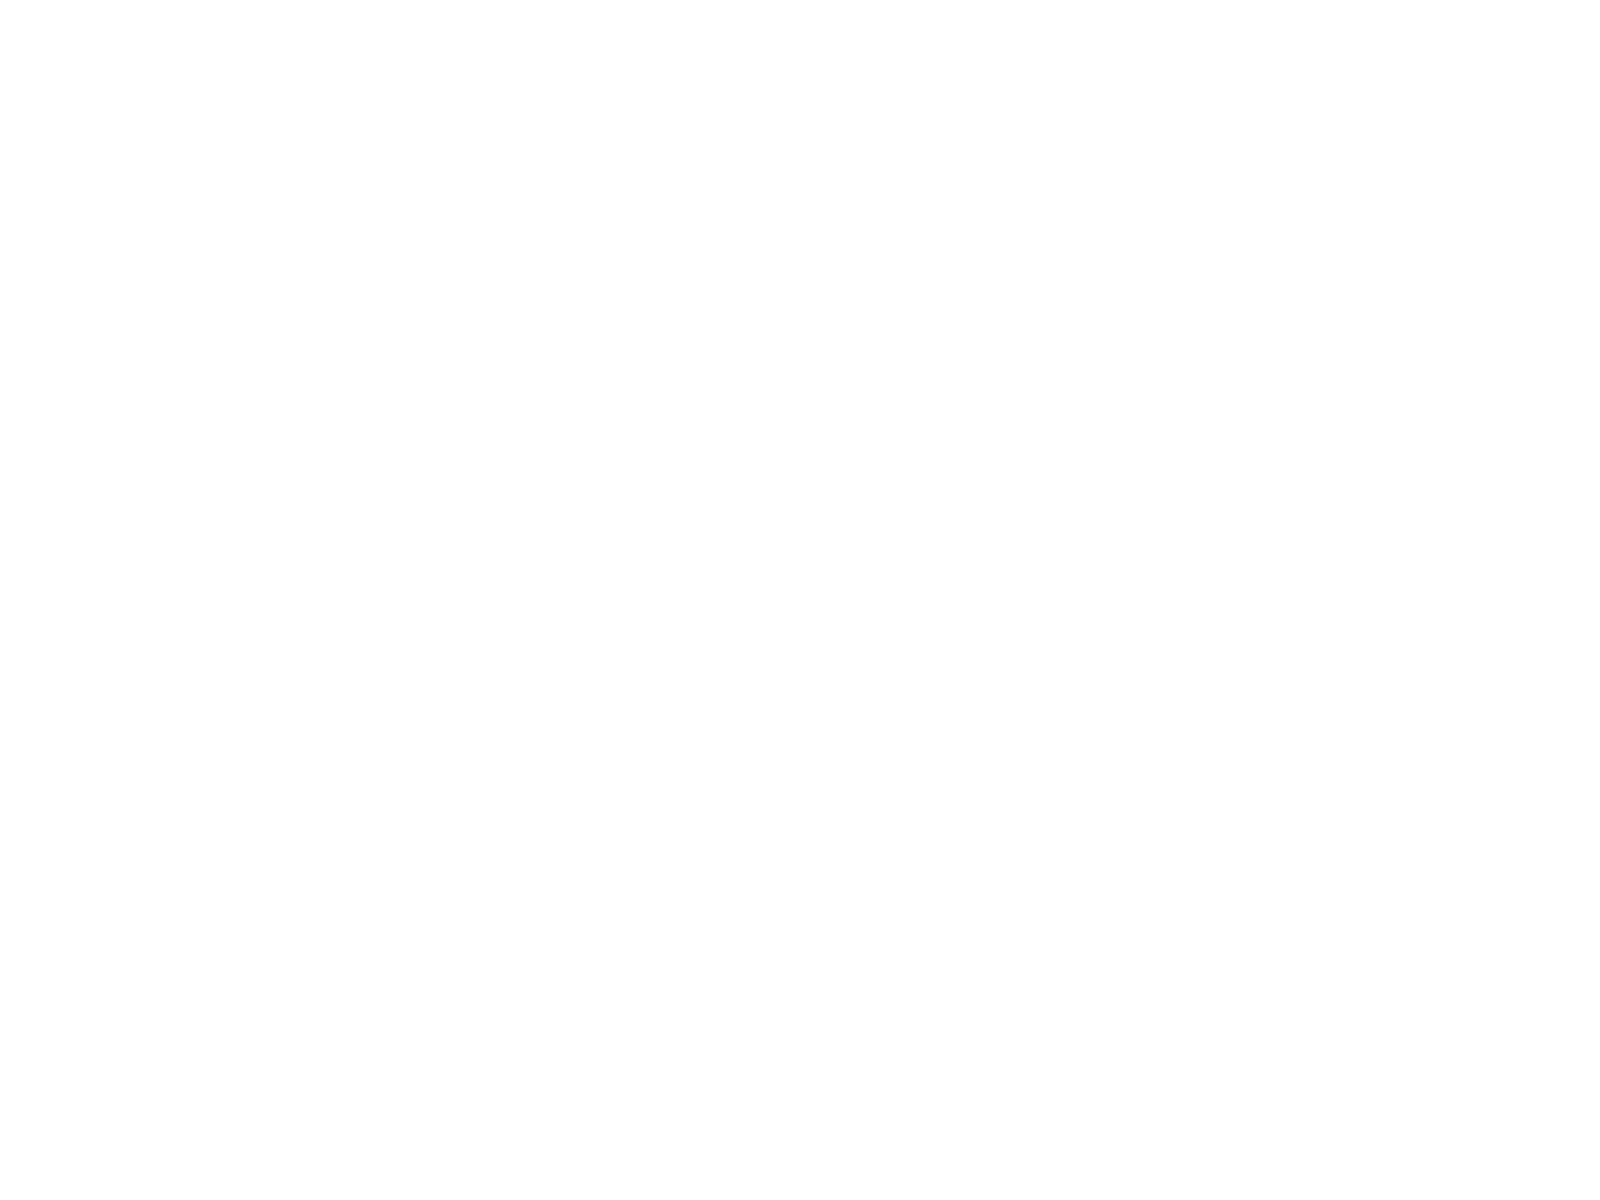

In [40]:
%matplotlib notebook
fig, ax = plt.subplots()
pos = []
def onclick(event):
    pos.append([event.xdata,event.ydata])
fig.canvas.mpl_connect('button_press_event', onclick)
plt.title('Colibrí')
plt.imshow(img)

In [38]:
pos

[[42.81249999999983, 886.0982142857146],
 [42.81249999999983, 826.9423701298704],
 [57.60146103896085, 735.7437770562774],
 [57.60146103896085, 661.7989718614721],
 [25.558712121211954, 600.178300865801],
 [28.023538961038753, 516.3741883116885],
 [57.60146103896085, 422.71076839826856],
 [119.22213203463178, 338.90665584415603],
 [138.94074675324663, 227.98944805194822],
 [203.02624458874442, 126.9315476190477],
 [276.97104978354963, 114.60741341991354],
 [363.2399891774891, 161.43912337662357],
 [449.5089285714284, 124.46672077922096],
 [548.102002164502, 65.31087662337688],
 [624.511634199134, 35.73295454545473],
 [639.3005952380952, 35.73295454545473],
 [604.7930194805194, 62.846049783549915],
 [557.9613095238094, 94.88879870129892],
 [476.6220238095237, 136.79085497835513],
 [412.5365259740258, 178.69291125541145],
 [380.493777056277, 235.38392857142878],
 [380.493777056277, 294.539772727273],
 [382.95860389610374, 358.62527056277077],
 [395.2827380952379, 422.71076839826856],
 [3

**Nota: una vez obtenida la lista `pos` dar click en el botón de apagado de interactividad.**

In [39]:
pos_array = np.array(pos)

In [40]:
x = pos_array[:,0]

Algunas entradas imprimimos de $x$:

In [41]:
x[0:10]

array([ 42.81,  42.81,  57.6 ,  57.6 ,  25.56,  28.02,  57.6 , 119.22,
       138.94, 203.03])

In [42]:
y = pos_array[:,1]

Algunas entradas imprimimos de $y$:

In [43]:
y[0:10]

array([886.1 , 826.94, 735.74, 661.8 , 600.18, 516.37, 422.71, 338.91,
       227.99, 126.93])

Definamos nuestro parámetro $t$ en el intervalo $[0,1]$:

In [44]:
t = np.linspace(0,1, len(x))

In [45]:
t

array([0.  , 0.03, 0.06, 0.08, 0.11, 0.14, 0.17, 0.19, 0.22, 0.25, 0.28,
       0.31, 0.33, 0.36, 0.39, 0.42, 0.44, 0.47, 0.5 , 0.53, 0.56, 0.58,
       0.61, 0.64, 0.67, 0.69, 0.72, 0.75, 0.78, 0.81, 0.83, 0.86, 0.89,
       0.92, 0.94, 0.97, 1.  ])

Construyamos el spline para las curvas $x(t)$, $y(t)$ que nos definirán las coordenadas.

In [46]:
pw_spline_x = interp1d(t, x, kind = 'cubic') #spline piecewise 
pw_spline_y = interp1d(t,y, kind = 'cubic') #spline piecewise 

Realicemos interpolación en $100$ puntos:

In [47]:
neval = 100
teval = np.linspace(min(t),max(t), neval)

In [48]:
xeval = pw_spline_x(teval)
yeval = pw_spline_y(teval)

In [49]:
print('xeval.shape:', xeval.shape[0])
print('yeval.shape:', yeval.shape[0])

xeval.shape: 100
yeval.shape: 100


In [50]:
xeval[0:10]

array([42.81, 39.51, 40.29, 43.92, 49.22, 54.95, 59.88, 62.18, 59.39,
       49.63])

In [51]:
yeval[0:10]

array([886.1 , 872.14, 848.82, 819.06, 785.8 , 751.96, 720.41, 692.4 ,
       667.56, 645.32])

In [52]:
window_y = 50
window_x = 500    
x_min = np.min(x)
y_min = np.min(y)
x_max = np.max(x)
y_max = np.max(y)

In [3]:
fig, ax = plt.subplots()
ax.plot(xeval,yeval)
ax.set_ylim(np.max(y)+window_y,np.min(y)-window_y)
plt.xlim(np.min(x)-window_x,np.max(x)+window_x)
plt.title('Colibrí con interpolación vía curva paramétrica')
plt.show()

In [63]:
def make_plot(ax, idx):
    ax.plot(x[:idx], y[:idx])
    ax.set_ylim(y_max+window_y,y_min-window_y)
    plt.xlim(x_min-window_x,x_max+window_x)
    plt.plot(x[:idx], y[:idx], 'bo-')
    plt.title('Colibrí con interpolación vía curva paramétrica')
    fig.canvas.draw()

In [4]:
%matplotlib notebook
fig, ax = plt.subplots()
for idx,_ in enumerate(t):
    make_plot(ax, idx)
    time.sleep(0.2)

**(Tarea) elegir una imagen y realizar interpolación con una curva paramétrica.**

**Referencias:**

* [animated_matplotlib-binder](https://github.com/fomightez/animated_matplotlib-binder)

* [how-get-a-x-y-position-pointing-with-mouse-in-a-interactive-plot-python](https://stackoverflow.com/questions/29379502/how-get-a-x-y-position-pointing-with-mouse-in-a-interactive-plot-python)

* [matplotlib: invert_axes](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/invert_axes.html)